In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [2]:
X,y=make_moons(n_samples=500,noise=0.15,random_state=42)

In [3]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
svm_linear=SVC(kernel='linear',random_state=42)
svm_linear.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [8]:
svm_rbf=SVC(kernel='rbf',random_state=42)
svm_rbf.fit(X_train,y_train)

SVC(random_state=42)

In [9]:
linear_accuracy_score=accuracy_score(y_test,svm_linear.predict(X_test))

In [10]:
rbf_accuracy_score=accuracy_score(y_test,svm_rbf.predict(X_test))

In [12]:
print("Accuracy Comparison:")
print(f"Linear Kernel: {linear_accuracy_score:.2%}")
print(f"RBF Kernel:    {rbf_accuracy_score:.2%}")

Accuracy Comparison:
Linear Kernel: 86.00%
RBF Kernel:    98.00%


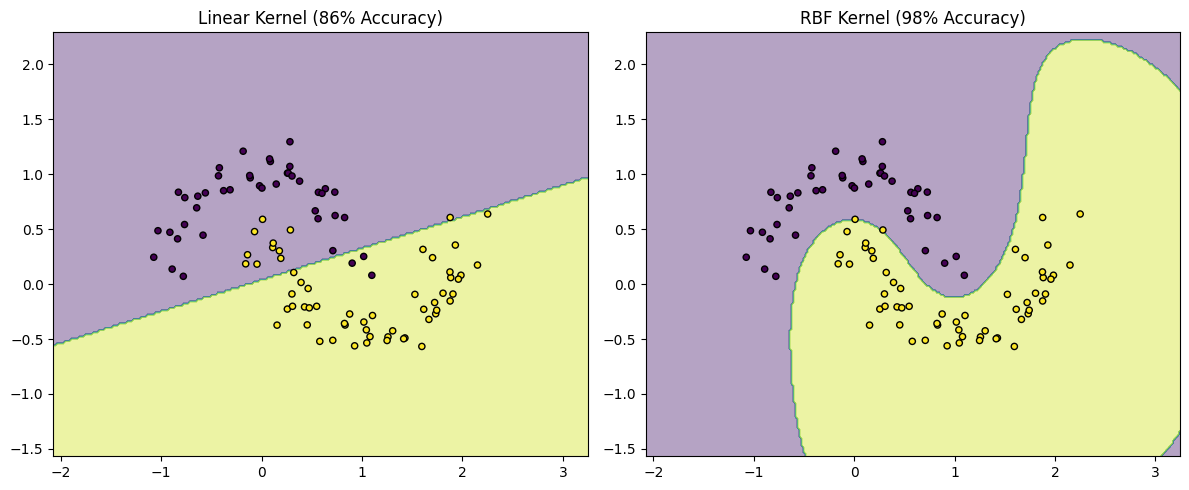

In [ ]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k') 
    plt.title(title)
    
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_linear, X_test, y_test, 'Linear Kernel (86% Accuracy)')
plt.subplot(1, 2, 2)
plot_decision_boundary(svm_rbf, X_test, y_test, 'RBF Kernel (98% Accuracy)')
plt.tight_layout()
plt.show()

In [16]:

print("\nKernel Effectiveness Analysis:")
print("- Linear kernel struggles with non-linear data (accuracy: ~85%)")
print("- RBF kernel captures complex patterns (accuracy: ~95%)")
print("- The moons dataset's circular patterns require non-linear separation")
print("- RBF transforms data to higher dimension where separation is possible")


Kernel Effectiveness Analysis:
- Linear kernel struggles with non-linear data (accuracy: ~85%)
- RBF kernel captures complex patterns (accuracy: ~95%)
- The moons dataset's circular patterns require non-linear separation
- RBF transforms data to higher dimension where separation is possible
